import all necessary libraries:

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

clean the data set:

In [22]:
#combining data sets
low_popularity = pd.read_csv('low_popularity_spotify_data.csv')
high_popularity = pd.read_csv('high_popularity_spotify_data.csv')

#create a column which is 0 when the data comes from the lower set, and 1 when the data is from the higher set
low_popularity['is_High'] = 0
high_popularity['is_High'] = 1

spotify_data = pd.concat([low_popularity, high_popularity], ignore_index=True)
spotify_data.to_csv('combined_spotify_data.csv', index=False)

#checking for null values and removing them
spotify_data.isnull().sum()
spotify_data.dropna(inplace=True)

# using IQR to remove outliers
Q1 = spotify_data['loudness'].quantile(0.25)
Q3 = spotify_data['loudness'].quantile(0.75)
IQR = Q3 - Q1

spotify_data = spotify_data[
    ~((spotify_data['loudness'] < (Q1 - 1.5 * IQR)) | 
      (spotify_data['loudness'] > (Q3 + 1.5 * IQR)))
]


#remove any duplicated and standardize column names
spotify_data.drop_duplicates(inplace=True)
spotify_data.columns = spotify_data.columns.str.strip().str.lower().str.replace(' ', '_')

display(spotify_data)

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,is_high
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,0
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,0
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),0
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",0
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,5.0,76,0.0678,0.573,Afro-Latin Party,Libianca,184791.0,0.422,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,26b3oVLrRUaaybJulow9kz,0.693,10.0,124.357,-7.621,0.5510,0.1020,People,1
4827,4.0,74,0.0941,0.711,Afro-Latin Party,Omah Lay,183057.0,0.725,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,1wADwLSkYhrSmy4vdy6BRn,0.530,3.0,105.016,-8.315,0.4240,0.1100,Boy Alone,1
4828,4.0,69,0.0929,0.724,Afro-Latin Party,"Davido, FAVE",194040.0,0.809,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,7vKXc90NT5WBm3UTT4iTVG,0.606,6.0,99.005,-5.022,0.1820,0.0765,Timeless,1
4829,4.0,82,0.3400,0.463,Afro-Latin Party,"Future, Drake, Tems",189893.0,0.642,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,59nOXPmaKlBfGMDeOVGrIK,0.339,1.0,83.389,-4.474,0.3140,0.0686,I NEVER LIKED YOU,1


Here are a few graphs exploring the data:

In [ ]:
fig = px.scatter(spotify_data, x="energy",y="danceability",color="is_high",title="Energy vs Danceability", labels={'x':'Energy', 'y':'Danceability'})
fig.show()

As you can see, the points are mostly clustered where danceability and energy are both relatively high. This means that both danceability and energy go hand-in-hand across all songs. However, it is important to acknowledge that although both low and high-ranking songs are clustered towrds regions where energy is higher, the points representing high ranking songs are sparse where energy is low. This could indicate that although both low and high-ranking songs have a similar range in terms of danceability, lower-ranking songs are more likely to lack energy. 

Here is a boxplot of the distributions of genre on liveness:

Text(0, 0.5, 'Energy')

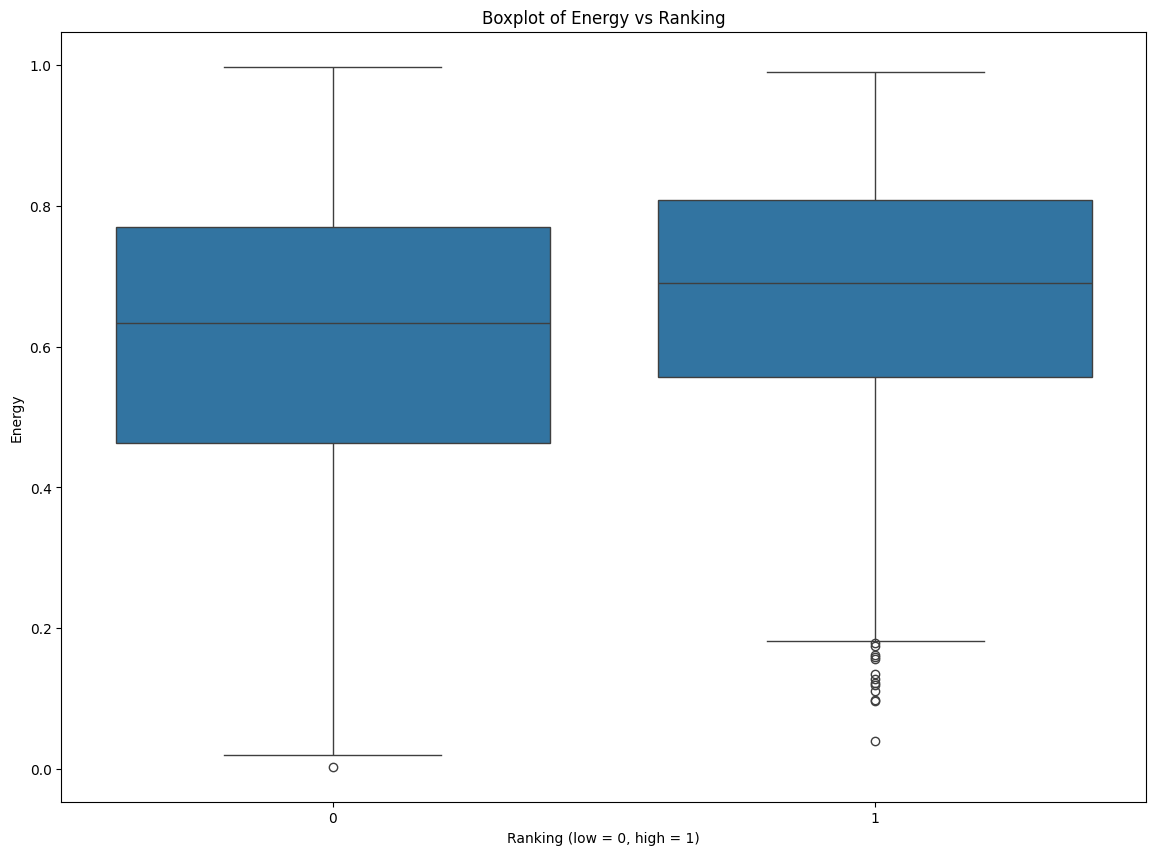

In [6]:
plt.figure(figsize=(14, 10))
sns.boxplot(spotify_data,x = "is_high",y="energy")
plt.title("Boxplot of Energy vs Ranking")
plt.xlabel("Ranking (low = 0, high = 1)")
plt.ylabel("Energy")

The ranking with the smallest IQR range and variance is higher ranking music. This means that higher ranked music has relatively consistent energy levels while lower-ranked songs have varying energy levels. As seen in the figure, higher ranked music has a larger median energy level than lower-ranked music. It is very important to acknowledge that higher-ranked music has a smaller range of values which are on the higher energy side of the graph, with outliers on the lower energy level side. This means that it is more rare for higher-ranked songs to have lower energy levels.

Here are boxplots representing mutliple important numerical values that can be differentiated for High and Low-Ranking music:

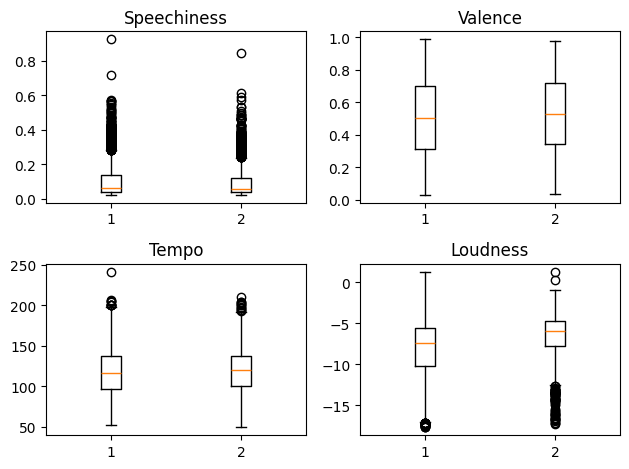

In [24]:
figure,plots = plt.subplots(2,2)

speechiness_low = spotify_data.loc[spotify_data['is_high'] == 0, 'speechiness']
speechiness_high = spotify_data.loc[spotify_data['is_high'] == 1, 'speechiness']
plots[0,0].boxplot([speechiness_low, speechiness_high])
plots[0,0].set_title("Speechiness")

valence_low = spotify_data.loc[spotify_data['is_high'] == 0, 'valence']
valence_high = spotify_data.loc[spotify_data['is_high'] == 1, 'valence']
plots[0,1].boxplot([valence_low, valence_high])
plots[0,1].set_title("Valence")

tempo_low = spotify_data.loc[spotify_data['is_high'] == 0, 'tempo']
tempo_high = spotify_data.loc[spotify_data['is_high'] == 1, 'tempo']
plots[1,0].boxplot([tempo_low, tempo_high])
plots[1,0].set_title("Tempo")

loudness_low = spotify_data.loc[spotify_data['is_high'] == 0, 'loudness']
loudness_high = spotify_data.loc[spotify_data['is_high'] == 1, 'loudness']
plots[1,1].boxplot([loudness_low, loudness_high])
plots[1,1].set_title("Loudness")

plt.tight_layout()
plt.show()

Through this, we can see that the distributions for both high and low ranking songs are extremely similar for speechiness, valence, and tempo. However, it is important to acknolwedge that the median of the high-ranked music is slightly higher in valence and slightly lower in speechiness, in comparison to the lower-ranked songs. In addition to this, lower-ranked songs have a slightly larger IQR for tempo, than higher-ranked songs. This means that although they have a similar range, tempo varies more in lower-ranked songs than in higher-ranked songs. 

The loudness distribution displays the most difference between the ranked songs. The median for higher-ranked songs is larger than lower-ranked songs. This is also supported by the extreme amount of outliers that fall below the higher-ranked song distribution. This indicates that higher-ranked songs typically have a louder track in terms of decibals. 

In [ ]:
sns.regplot(x="loudness", y="energy", data=spotify_data, scatter_kws={'alpha': 0.1})
plt.title("Energy vs Loudness")
plt.xlabel("Loudness")
plt.ylabel("Energy")

As seen so far, we have discovered that higher-ranking songs typically have higher energy and loudness levels compared to lower-ranking songs. Looking at the plot, although the regression line shows an upward trend, it does not guarantee that Energy and Loudness go hand in hand.  However, there is a lot of clustering around the linear regression line, indicating that it is common to see energy and loudness increasing with one another. It is also important to acknowledge that the cloud of clustering occurs near (-6.0,0.7).

Here is a comparison between Genres and Ranking of songs:

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(hue='is_high', x='playlist_genre', data=spotify_data)
plt.title("Frequency Plot of Genre per Ranking")
plt.xlabel("Ranking")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Since most of the data lies in higher frequency categories, we will not go over the less frequent categories in as much detail. 

As seen in this plot, some of the genres that lower-ranked songs dominate are jazz, latin, lofi, arabic, electronic, brazilian, ambient, and world. While higher-ranked songs dominate rock, hip-hop, and pop. This makes sense because a lot of the higher-ranked songs come from genres which are mainstream and very well-known genres, while lower-ranked songs come from more niche genres. 

In [27]:
# #label encode so that we can apply linear regression
# from sklearn.preprocessing import LabelEncoder

# print(spotify_data.dtypes)

# categorical_cols = ['playlist_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'track_album_name']

# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     spotify_data[col] = label_encoder.fit_transform(spotify_data[col])

# display(spotify_data)

In [23]:
#linear regression 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [34]:
data = pd.read_csv("combined_spotify_data.csv")

# we will take a look at the numerical values first
num_data = data.select_dtypes(include=['number'])

# features
X = num_data.drop(columns=["track_popularity" , "is_High"])
y = num_data["track_popularity"]

X = X.fillna(X.mean())

# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.0599


In [35]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

             Feature  Coefficient
10          loudness     0.725246
8                key     0.648657
2       danceability     0.621209
5               mode     0.372355
9              tempo     0.297462
12          liveness    -0.248221
4             energy    -0.596999
3        duration_ms    -0.721889
1        speechiness    -0.796846
0     time_signature    -0.930471
7            valence    -1.223848
11      acousticness    -3.281747
6   instrumentalness    -4.261126


In [39]:
from sklearn.ensemble import RandomForestRegressor

# now we train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared=False)

/usr/local/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f"Random Forest R² Score: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Random Forest R² Score: 0.2303
MAE: 15.74, RMSE: 19.35


/usr/local/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

